# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Aksal Abitahta Turipan
- **Email:** gothsaiko2@gmail.com
- **ID Dicoding:** A006YBF044

## Menentukan Pertanyaan Bisnis

- Bagaimana perbandingan tren penggunaan sepeda antara tahun 2011 dan 2012, serta faktor-faktor apa yang mungkin berkontribusi terhadap perubahan tersebut?
- Sejauh mana perbedaan rata-rata penggunaan sepeda oleh pengguna casual dan registered pada berbagai kondisi cuaca (baik, berkabut, hujan ringan)?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

## Data Inspection

### Tahap Data Inspection (Pemeriksaan Awal Dataset)

Langkah pertama dalam proses analisis data adalah memahami isi dan struktur dataset. Berikut beberapa pengecekan dasar yang dilakukan:

#### 1. Load Dataset
Dataset dimuat dari file `day.csv` yang sudah diekstrak sebelumnya dari file ZIP.


`df = pd.read_csv("/content/data/day.csv")`



*   Cek Struktur & Info Data
*   Statistik Deskriptif
*   Cek Struktur & Info Data
*   Cek Missing Value
*   Cek Data Duplikat
*   Tampilkan Data awal

### Kesimpulan Sementara:
- **Tidak ditemukan missing value maupun data duplikat.**
- Dataset sudah cukup bersih untuk dilanjutkan ke tahap berikutnya: **Data Wrangling.**




In [ ]:
# day.csv
day_df = pd.read_csv("/content/data/day.csv")

# Cek Struktur & Info awal
print("Struktur Data: ")
print(day_df.info())

print("\n Statistik Awal:")
print(day_df.describe())

print("\n Missing Value:")
print(day_df.isnull().sum())

print("\n Duplikat:")
print(day_df.duplicated().sum())

# Preview 5 baris awal
day_df.head()

Struktur Data: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None

 Statistik Awal:
          instant      season          yr        mnth 

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
# hour.csv
hour_df = pd.read_csv("/content/data/hour.csv")

# Cek Struktur & Info awal
print("Struktur Data: ")
print(hour_df.info())

print("\n Statistik Awal:")
print(hour_df.describe())

print("\n Missing Value:")
print(hour_df.isnull().sum())

print("\n Duplikat:")
print(hour_df.duplicated().sum())

# Preview 5 baris awal
hour_df.head()

Struktur Data: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None

 Statistik Awal:
          

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Data Wrangling

###  Tahap Data Wrangling (Pembersihan dan Transformasi Data)

Setelah melakukan inspeksi awal, tahap selanjutnya adalah melakukan pembersihan dan transformasi data agar lebih siap untuk dianalisis.

#### 1. Mengubah Kolom `dteday` Menjadi Format DateTime
Kolom `dteday` diubah ke format datetime agar bisa dimanfaatkan untuk analisis berbasis waktu.

```
df['dteday'] = pd.to_datetime(df['dteday'])
  ```

actually we just do quick inspect earlier, but we do it detail right here


### Gathering Data

Pada tahap ini, memuat dataset Bike Sharing yang terbagi menjadi dua file, yaitu:
- **day.csv**: Berisi informasi penggunaan sepeda per hari.
- **hour.csv**: Berisi informasi penggunaan sepeda per jam.

In [ ]:
# Read daily data
day_df = pd.read_csv("/content/data/day.csv")

# Read hourly data
hour_df = pd.read_csv("/content/data/hour.csv")

print("Daily Data sample:")
print(day_df.head())

print("\n Hourly Data sample:")
print(hour_df.head)

Daily Data sample:
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  

 Hourl

**Insight:**
- Jumlah baris,kolom dan tipe data(apakah numerik,kategori atau tanggal)
- Nama kolom

### Assessing Data

### Memeriksa Struktur Dataset

Code ini memberikan informasi dasar (`info()`) dari dataset **daily** dan **hourly**. Fungsi `info()` menampilkan jumlah kolom, tipe data, dan jumlah **non-null** values di setiap kolom.

In [ ]:
# Daily Data
print("\n---- day_df info ----")
print(day_df.info())

# Hourly Data
print("\n---- houe_df info ----")
print(hour_df.info())


---- day_df info ----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None

---- houe_df info ----
<class 'pandas.core.frame.DataFrame'>
Ran

In [ ]:
print("\n--- day_df describe ---")
print(day_df.describe())

print("\n--- df_hour describe ---")
print(hour_df.describe())


--- day_df describe ---
          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
st

In [ ]:
print("\n Missing Value in day_df:")
print(day_df.isnull().sum())

print("\n Missing Value in hour_df:")
print(hour_df.isnull().sum())


 Missing Value in day_df:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

 Missing Value in hour_df:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [ ]:
print("\n Duplikat in day_df:")
print(day_df.duplicated().sum())

print("\n Duplikat in hour_df:")
print(hour_df.duplicated().sum())


 Duplikat in day_df:
0

 Duplikat in hour_df:
0


In [ ]:
print("\n Unique Value in 'season' (daily) day_df:")
print(day_df['season'].nunique())

print("\n Unique Value in 'weathersit' (hourly) hour_df:")
print(hour_df['weathersit'].nunique())


 Unique Value in 'season' (daily) day_df:
4

 Unique Value in 'weathersit' (hourly) hour_df:
4


**Insight:**
- xxx
- xxx

### Cleaning Data

Proses ini bertujuan untuk **meningkatkan kualitas dan konsistensi data** sebelum ke EDA. Langkah-langkah nya adalah menghapus duplikasi, mengganti nama kolom, mengubah tipe data menjadi format yang sesuai, dan membuat fitur baru.



In [ ]:
# Convert dateday to datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'], errors='coerce')
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'], errors='coerce')

In [ ]:
# Rename Columns
day_df.rename(columns={
    'yr': 'year',
    'mnth': 'month',
    'hum': 'humidity',
    'cnt': 'total_rentals'
}, inplace=True)

hour_df.rename(columns={
    'yr': 'year',
    'mnth': 'month',
    'hr': 'hour',
    'hum': 'humidity',
    'cnt': 'total_rentals'
}, inplace=True)

In [ ]:
# Convert 'dteday' to datetime (day_df & hour_df)
day_df['dteday'] = pd.to_datetime(day_df['dteday'], errors='coerce')
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'], errors='coerce')

In [ ]:
# Create Feature for analyzing trends by weekday or month
day_df['day_of_week'] = day_df['dteday'].dt.day_name()
hour_df['day_of_week'] = hour_df['dteday'].dt.day_name()

day_df['month_name'] = day_df['dteday'].dt.month_name()
hour_df['month_name'] = hour_df['dteday'].dt.month_name()

In [ ]:
# Convert year from 0/1 to 2011/2012
day_df['year_actual'] = day_df['year'].apply(lambda x: 2011 if x == 0 else 2012)
hour_df['year_actual'] = hour_df['year'].apply(lambda x: 2011 if x == 0 else 2012)

In [ ]:
# Convert normalized temperature to  real Celsius
day_df['temp_c'] = day_df['temp'] * 41
hour_df['temp_c'] = hour_df['temp'] * 41

In [ ]:
# Checking final info
print("--- Cleaned day_df ---")
day_df.info()
print(day_df.head())

print("\n--- Cleaned hour_df ---")
hour_df.info()
print(hour_df.head())

--- Cleaned day_df ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   instant        731 non-null    int64         
 1   dteday         731 non-null    datetime64[ns]
 2   season         731 non-null    int64         
 3   year           731 non-null    int64         
 4   month          731 non-null    int64         
 5   holiday        731 non-null    int64         
 6   weekday        731 non-null    int64         
 7   workingday     731 non-null    int64         
 8   weathersit     731 non-null    int64         
 9   temp           731 non-null    float64       
 10  atemp          731 non-null    float64       
 11  humidity       731 non-null    float64       
 12  windspeed      731 non-null    float64       
 13  casual         731 non-null    int64         
 14  registered     731 non-null    int64         
 15  

**Insight:**
- Tidak Ada Missing Value
- Tidak Ada Duplicate
- Colum Renaming
- Proper Date/Time Conversion
- Create some feature engineering

**Data Ready for EDA**

## Exploratory Data Analysis (EDA)

### Explore day_df

In [ ]:
# stats for daily data
day_df.describe()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,total_rentals,year_actual,temp_c
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837,2011.500684,20.310776
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,2011.000000,2.424346
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000,2011.000000,13.820424
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000,2012.000000,20.431653
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000,2012.000000,26.872076
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000,2012.000000,35.328347
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452,0.500342,7.505091


### Daily


Dari table diatas ditemukan beberapa interesting Points
- total_rentals
- temp_c

### total_rentals
- mean:4504
- median:4548
- max: 8714
- min: 22

***mean < median***

> distribusi total_rentals cenderung sedikit left-skewed yang mana sebagian besar hari punya jumlah rental tinggi, tapi ada beberapa hari dengan rental yang kecil banget(could be hari hujan,libur atau karena cuaca)


  

### temp_c
- mean:20.31
- median: 20.43
- max: 35.33
- min: 2.42


> mean dan median hampir sama, distribusinya bisa jadi simetris, tapi dari range min dan max ada `hari yang dingin banget` dan ada juga `hari yang panas banget`.




In [ ]:
# stats for hourly data
hour_df.describe()

,instant,dteday,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,total_rentals,year_actual,temp_c
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,2011.502561,20.376474
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2011.000000,0.820000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,2011.000000,13.940000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,2012.000000,20.500000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,2012.000000,27.060000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,2012.000000,41.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599,0.500008,7.894801


### Hourly

### total_rentals
- mean:189
- median:142
- max: 977
- min: 1

***mean > median***

> Jumlah peminjaman sepeda per jam punya pola peak hour vs jam sepi, yang bisa dieksplor lebih lanjut pake grafik.


  

### temp_c
- mean:20.37
- median: 20.5
- max: 41.0
- min: 0.82


> Sebagian besar jam punya suhu yang "nyaman", tapi tetap ada beberapa jam sangat dingin atau sangat panas..




### Histogram Daily

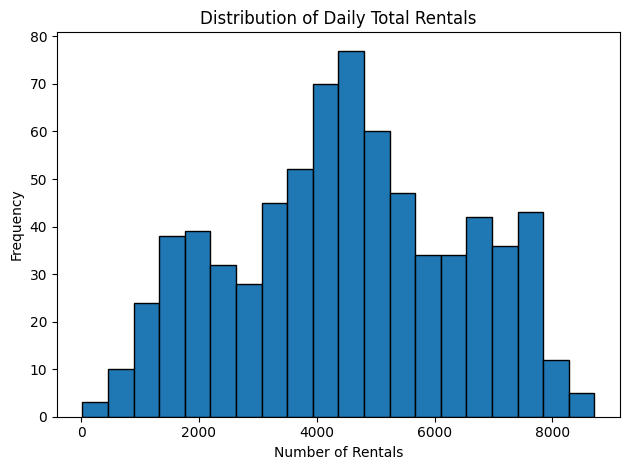

In [ ]:
# Distribution of daily total rentals

# Histogram of daily total rentals
plt.figure()
plt.hist(day_df['total_rentals'], bins=20, edgecolor='black')
plt.title('Distribution of Daily Total Rentals')
plt.xlabel('Number of Rentals')
plt.ylabel('Frequency')
plt.tight_layout()

plt.show()




left skewed

### Histogram Hourly


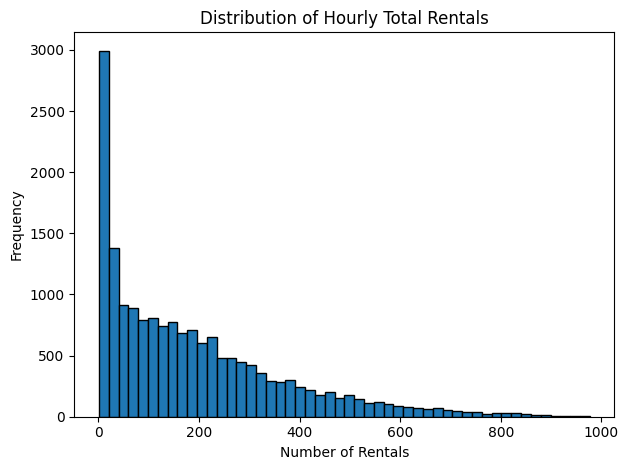

In [ ]:
# Distribution of hourly total rentals

# Histogram of hourly total rentals
plt.figure()
plt.hist(hour_df['total_rentals'], bins=50, edgecolor='black')
plt.title('Distribution of Hourly Total Rentals')
plt.xlabel('Number of Rentals')
plt.ylabel('Frequency')
plt.tight_layout()

plt.show()




Right skewed

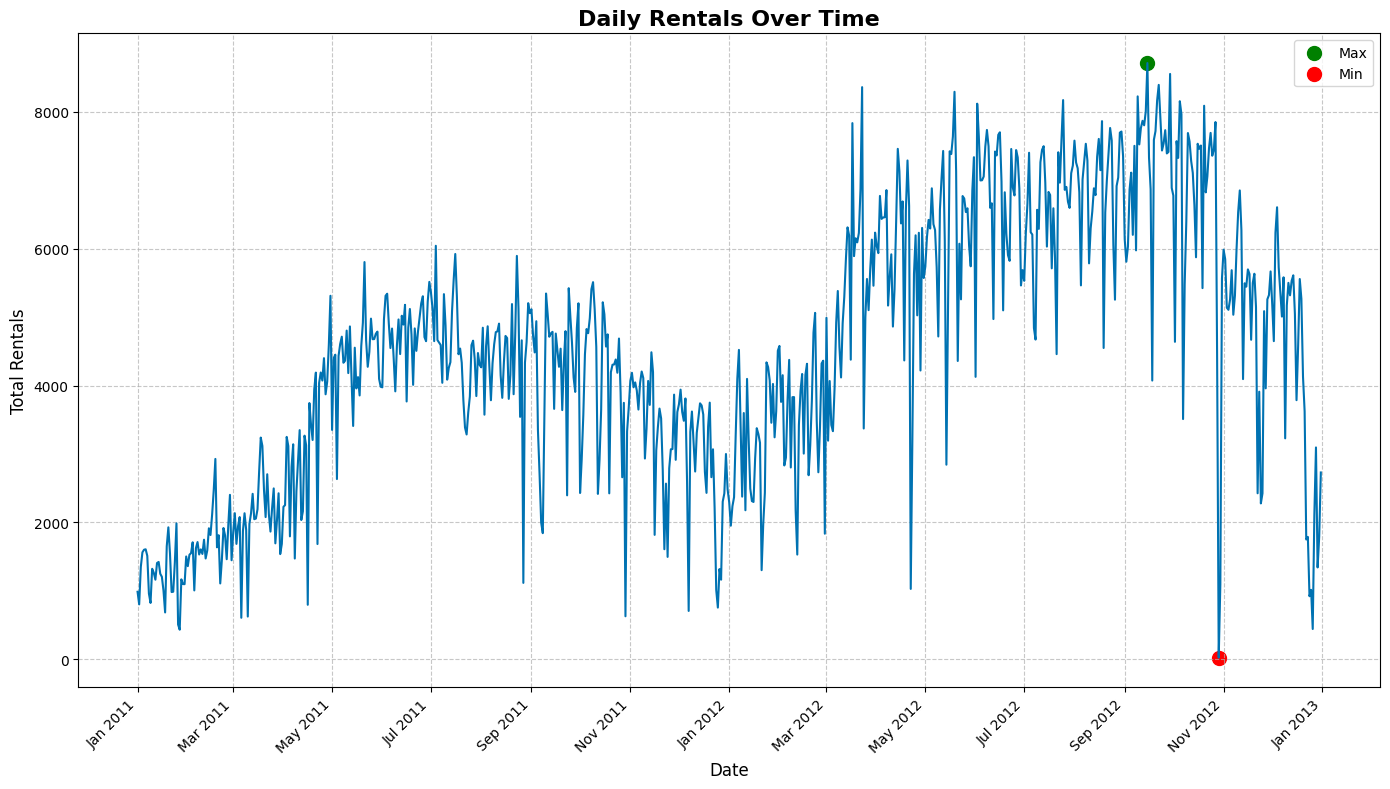

In [ ]:
## Time-Seriex Exploration
# Trend Over Time(daily)
plt.figure(figsize=(14, 8))  # Ukuran gambar lebih besar untuk keterbacaan lebih baik

# Plot data dengan warna dan ketebalan garis yang lebih jelas
plt.plot(day_df['dteday'], day_df['total_rentals'], color='#0072B2', linewidth=1.5)

# Menambahkan judul dan label dengan ukuran font yang lebih besar
plt.title('Daily Rentals Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Rentals', fontsize=12)

# Menambahkan grid untuk memudahkan pembacaan nilai
plt.grid(True, linestyle='--', alpha=0.7)

# Format sumbu x untuk menampilkan tanggal dengan lebih baik
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))  # Tanda setiap 2 bulan
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Format 'Bulan Tahun'
plt.gcf().autofmt_xdate(rotation=45)  # Memutar label tanggal dengan sudut 45 derajat

# Mengatur padding dan layout agar tidak terpotong
plt.tight_layout()

# Menambahkan highlight untuk nilai maksimum dan minimum (opsional)
max_idx = day_df['total_rentals'].idxmax()
min_idx = day_df['total_rentals'].idxmin()
plt.scatter(day_df['dteday'][max_idx], day_df['total_rentals'][max_idx], color='green', s=100, label='Max')
plt.scatter(day_df['dteday'][min_idx], day_df['total_rentals'][min_idx], color='red', s=100, label='Min')
plt.legend()

plt.show()




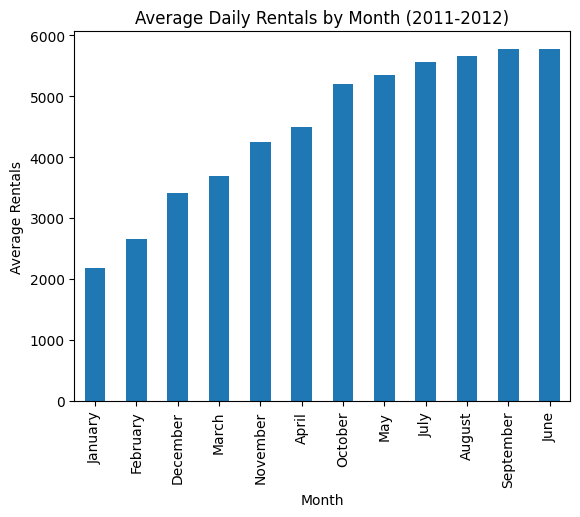

In [ ]:
# Group by month_name or month to see average rentals
rentals_by_month = day_df.groupby('month_name')['total_rentals'].mean().sort_values()

plt.figure()
rentals_by_month.plot(kind='bar')
plt.title('Average Daily Rentals by Month (2011-2012)')
plt.xlabel('Month')
plt.ylabel('Average Rentals')
plt.show()

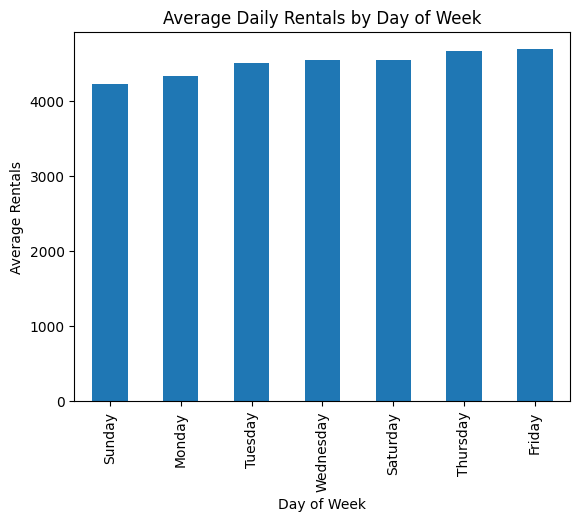

In [ ]:
rentals_by_weekday = day_df.groupby('day_of_week')['total_rentals'].mean().sort_values()

plt.figure()
rentals_by_weekday.plot(kind='bar')
plt.title('Average Daily Rentals by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Rentals')
plt.show()

Terlihat weekend higher than weekdays

In [ ]:
# For daily data, pick numeric columns
numeric_cols = ['temp_c', 'humidity', 'windspeed', 'total_rentals']

corr_matrix = day_df[numeric_cols].corr()
print(corr_matrix)

                 temp_c  humidity  windspeed  total_rentals
temp_c         1.000000  0.126963  -0.157944       0.627494
humidity       0.126963  1.000000  -0.248489      -0.100659
windspeed     -0.157944 -0.248489   1.000000      -0.234545
total_rentals  0.627494 -0.100659  -0.234545       1.000000


Suhu (temp_c) adalah indikator paling kuat: cuaca yang hangat → peminjaman sepeda meningkat.

Humidity & windspeed punya efek negatif, tapi jauh lebih kecil.

Korelasi ≠ sebab-akibat → perlu analisis/modeling lanjutan untuk make sure pengaruh sebenarnya.



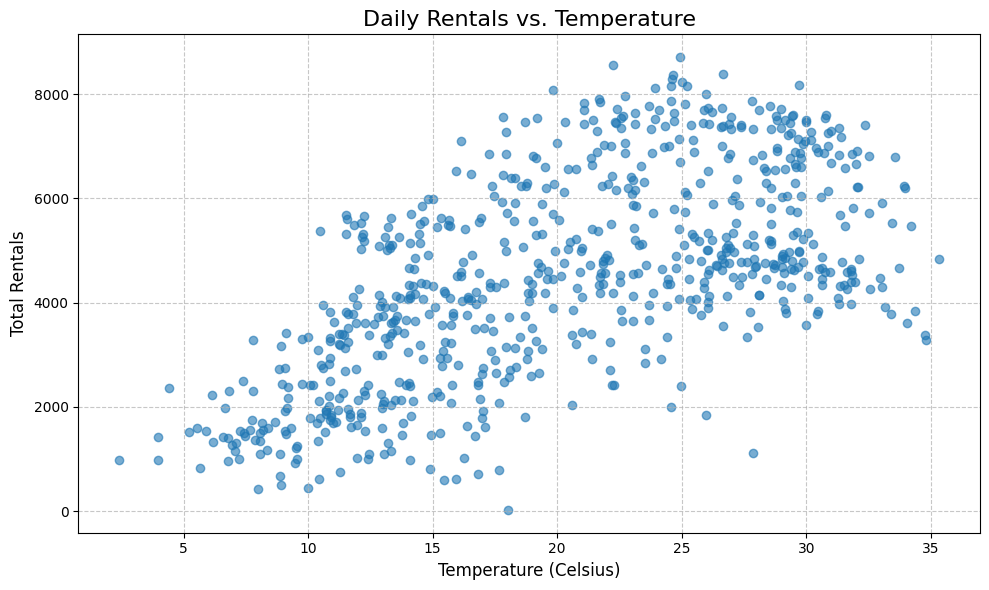

In [ ]:
plt.figure(figsize=(10, 6))  # Atur ukuran gambar agar lebih proporsional
plt.scatter(day_df['temp_c'], day_df['total_rentals'], alpha=0.6)  # Tambahkan alpha untuk transparansi
plt.title('Daily Rentals vs. Temperature', fontsize=16)  # Perbesar ukuran font judul
plt.xlabel('Temperature (Celsius)', fontsize=12)  # Perjelas label sumbu x
plt.ylabel('Total Rentals', fontsize=12)  # Perjelas label sumbu y
plt.grid(True, linestyle='--', alpha=0.7)  # Tambahkan grid untuk memudahkan pembacaan
plt.tight_layout()  # Atur layout agar tidak terpotong
plt.show()

### Hourly


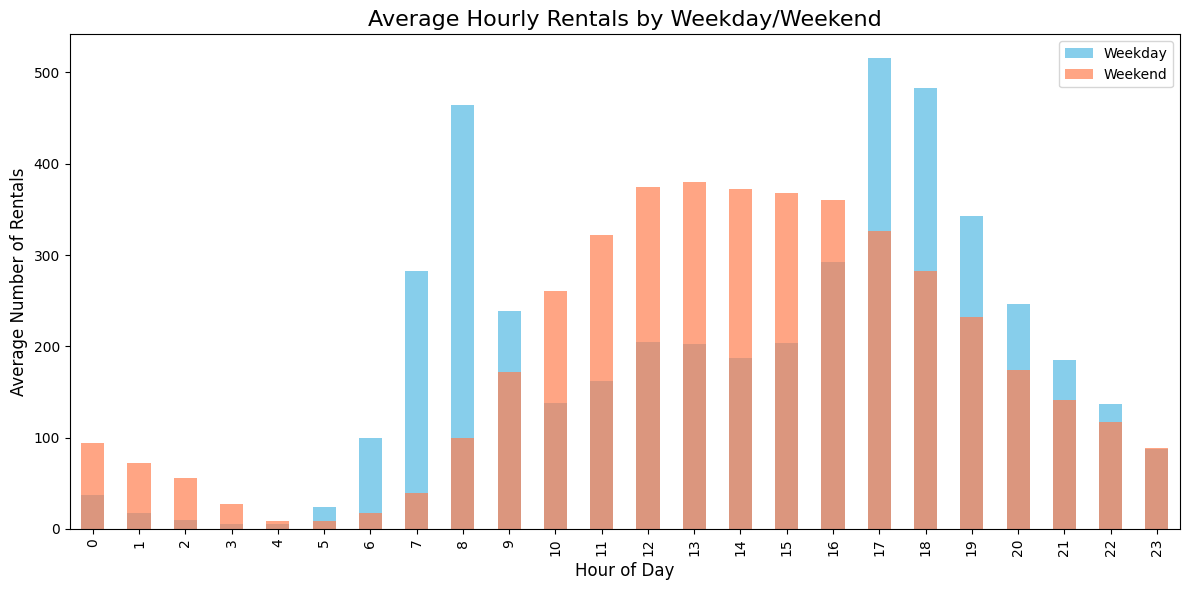

In [ ]:
# Create a new column 'weekday' (1 for weekdays, 0 for weekends)
hour_df['weekday'] = hour_df['day_of_week'].apply(lambda day: 1 if day in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'] else 0)

# Group by hour and weekday to get average rentals
hourly_trends_weekday = hour_df[hour_df['weekday'] == 1].groupby('hour')['total_rentals'].mean()
hourly_trends_weekend = hour_df[hour_df['weekday'] == 0].groupby('hour')['total_rentals'].mean()

# Create the plot
plt.figure(figsize=(12, 6))  # Adjust figure size for better readability

# Plot weekday and weekend trends with different colors
hourly_trends_weekday.plot(kind='bar', color='skyblue', label='Weekday')
hourly_trends_weekend.plot(kind='bar', color='coral', label='Weekend', alpha=0.7)  # Use alpha for transparency

# Add title and labels
plt.title('Average Hourly Rentals by Weekday/Weekend', fontsize=16)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Average Number of Rentals', fontsize=12)

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

**Insight:**
- Distribusi cenderung right-skewed: Kebanyakan hari punya rentals menengah (3–5 ribu), tapi ada beberapa hari yang meledak di atas 8 ribu.
- Mengindikasikan sebagian kecil hari “peak” rental yang tinggi (mungkin event/cuaca spesial).


## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah peningkatan penggunaan sepeda di tahun 2012 murni karena faktor musiman (cuaca) atau juga didorong oleh kebijakan/infrastruktur?

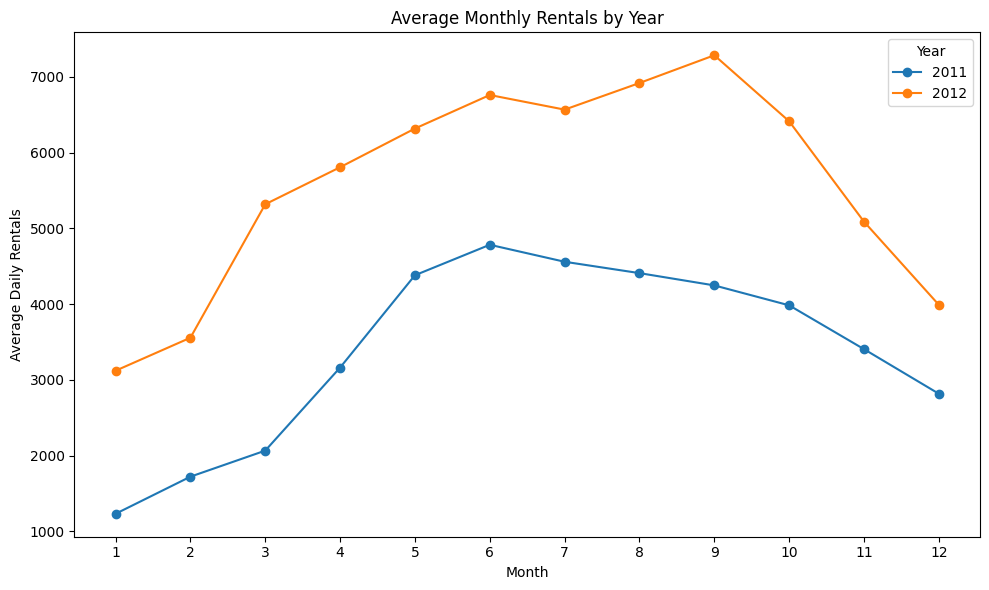

In [ ]:

day_df['year_actual'] = day_df['year'].apply(lambda x: 2011 if x == 0 else 2012)

monthly_comparison = day_df.groupby(['year_actual', 'month'])['total_rentals'].mean().reset_index()


plt.figure(figsize=(10,6))
for year in monthly_comparison['year_actual'].unique():
    subset = monthly_comparison[monthly_comparison['year_actual'] == year]
    plt.plot(subset['month'], subset['total_rentals'], marker='o', label=str(year))
plt.title('Average Monthly Rentals by Year')
plt.xlabel('Month')
plt.ylabel('Average Daily Rentals')
plt.legend(title='Year')
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()


- Garis warna orange (2012) konsisten lebih tinggi dibanding garis biru (2011) di setiap bulan.

- Keduanya punya pola musiman yang mirip (naik menuju puncak di musim panas Juni-September (musim panas), turun saat mendekati musim dingin  (Desember-Februari).

- Selisih 2012 vs. 2011 cukup konstan di seluruh bulan

### Pertanyaan 2:Bagaimana dampak cuaca ekstrem (misalnya, hujan lebat/suhu sangat rendah) terhadap perilaku pengguna casual vs. registered?

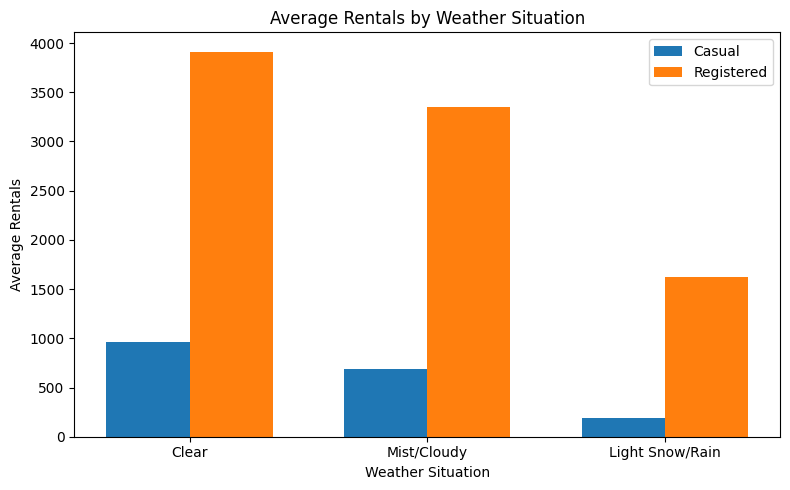

In [ ]:
# Group by weather situation: hitung rata-rata casual dan registered rentals
weather_groups = day_df.groupby('weathersit').agg({'casual': 'mean', 'registered': 'mean'}).reset_index()

# Buat grouped bar chart
x = weather_groups['weathersit']
width = 0.35

fig, ax = plt.subplots(figsize=(8,5))
ax.bar(x - width/2, weather_groups['casual'], width, label='Casual')
ax.bar(x + width/2, weather_groups['registered'], width, label='Registered')

ax.set_xlabel('Weather Situation')
ax.set_ylabel('Average Rentals')
ax.set_title('Average Rentals by Weather Situation')

# Perjelas label sumbu x dengan keterangan cuaca
ax.set_xticks(x)
ax.set_xticklabels(['Clear', 'Mist/Cloudy', 'Light Snow/Rain'], rotation=0, ha='center')

ax.legend()
plt.tight_layout()
plt.show()

- Registered (bar orange) selalu lebih tinggi daripada casual (bar biru) di setiap kondisi cuaca.

- Cuaca cerah (1): paling banyak rentals untuk keduanya.

- Cuaca lebih buruk (2, 3): rentals turun, terutama untuk casual.

**Insight:**
- Faktor Musiman vs. Kebijakan: Data bulanan menunjukkan peningkatan 2012 bukan semata karena cuaca. Ada faktor lain mungkin(promosi, stasiun baru, dsb.).

- Perbedaan Casual vs. Registered di Cuaca Ekstrem: Casual lebih anjlok di kondisi cuaca buruk, sedangkan registered masih tetap lebih tinggi (meski turun juga).

## Analisis Lanjutan (Opsional)

## Conclusion

### Kesimpulan
- Ada Pertumbuhan Penggunaan

Tahun 2012 consistently lebih tinggi dibanding 2011 di setiap bulan ⇒ indikasi ekspansi, kebijakan, atau promosi baru, bukan sekadar faktor cuaca.

- Efek Cuaca

> Cuaca cerah (weathersit=1) mendorong rentals tertinggi, sedangkan cuaca buruk menurunkan rentals, terutama di segmen casual.

- Implikasi

> - Untuk menjaga penggunaan di cuaca buruk, operator bisa fokus ke strategi penanganan (misalnya: diskon saat hujan, infrastruktur peneduh, dll.).
- Kenaikan total rentals di 2012 menandakan potensi pasar terus berkembang; perlu dukungan infrastruktur (penambahan stasiun, jalur sepeda aman) untuk mempertahankan tren positif.



